#House Prices - Advanced Regression Techniques


##Initial Data Exploration

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#download the data from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/discussion?sort=hotness
df=pd.read_csv('/content/train.csv', encoding='latin-1')
df.head()
# SalePrice
column_names = df.columns.tolist()
print(column_names)
column_total = len(df.columns)
print('column_total: ',column_total)
df['SalePrice'].describe()

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [3]:
#look for features that are numeric that we can use for correlation
numeric_cols = df.select_dtypes(include=['int', 'float'])
print(numeric_cols)
numberic_column_names = numeric_cols.columns.tolist()
print(numberic_column_names)
print(numeric_cols)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

##Exploring specific variables by using plots

###Skewness and Kurtosis
Skewness: 1.882876, Kurtosis: 6.536282

In [4]:
kurtosis = df['SalePrice'].kurt()
skewness = df['SalePrice'].skew()
print("Skewness: %f" %skewness)
print("Kurtosis: %f" %kurtosis)

Skewness: 1.882876
Kurtosis: 6.536282


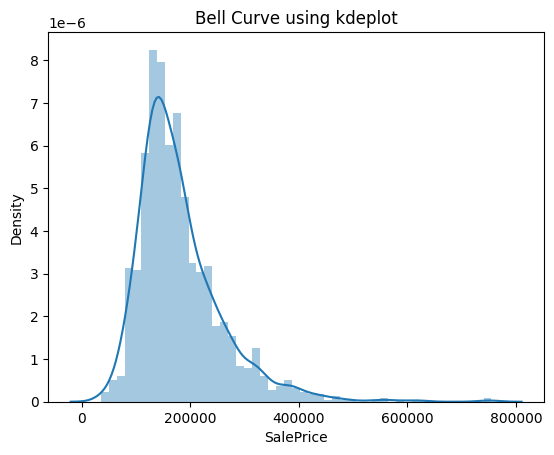

In [5]:

sns.distplot( df['SalePrice'] )
plt.title('Bell Curve using kdeplot')
plt.show()

###Scatter Plots

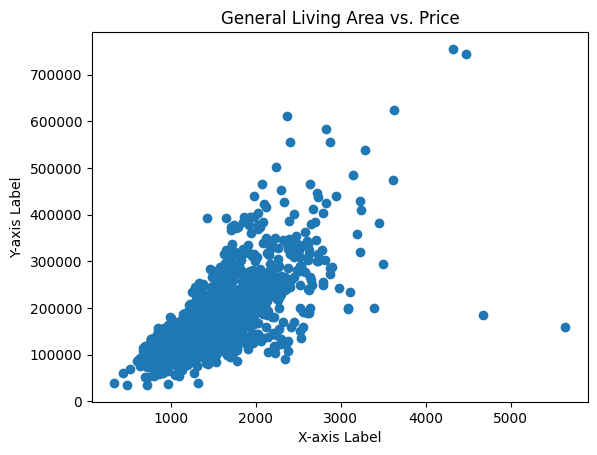

In [6]:
#Scatter Plot for Greater Living Area
x = df['GrLivArea']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)
# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("General Living Area vs. Price")
# Display the plot
plt.show()

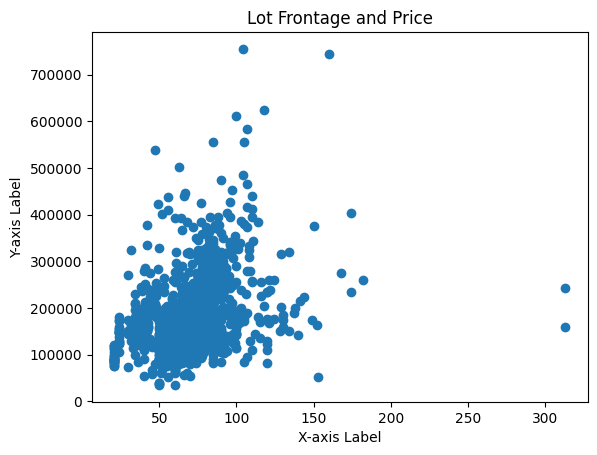

In [7]:
#Scatter Plot for LotFrontage and Price
x = df['LotFrontage']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Lot Frontage and Price")

# Display the plot
plt.show()

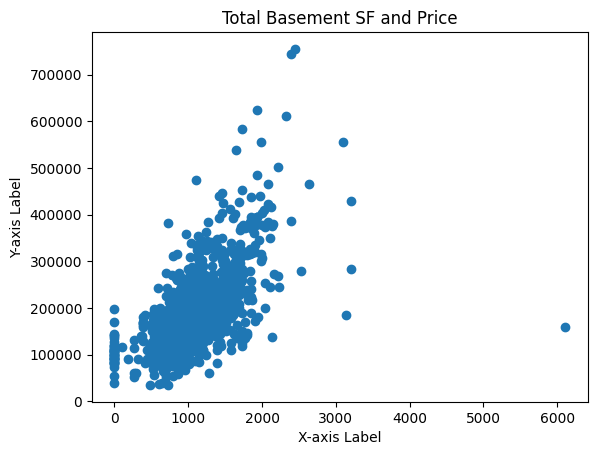

In [8]:
#Scatter Plot for Total Basement SF and Price
x = df['TotalBsmtSF']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Total Basement SF and Price")

# Display the plot
plt.show()

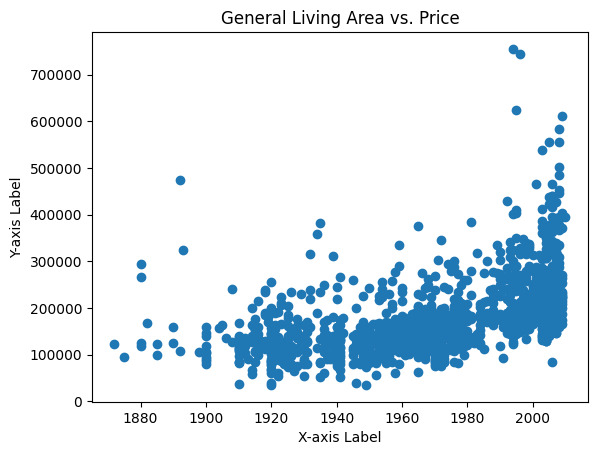

In [9]:
#Scatter Plot for Greater Living Area
x = df['YearBuilt']
y = df['SalePrice']

# Create the scatter plot
plt.scatter(x, y)
# Add labels and title (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("General Living Area vs. Price")
# Display the plot
plt.show()

In [10]:
#next week
#Relationship with categorical feature



<Axes: xlabel='OverallQual', ylabel='SalePrice'>

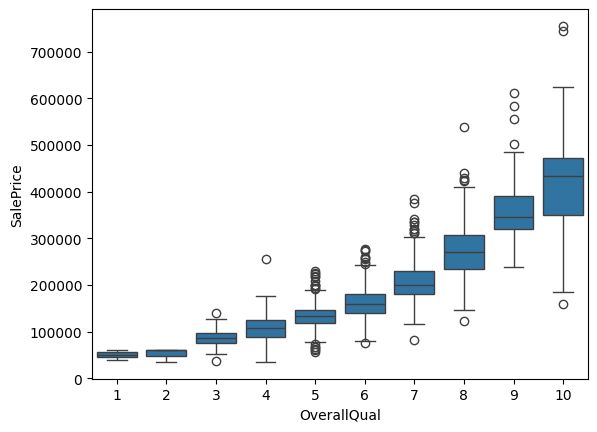

In [12]:

sns.boxplot(data=df, x="OverallQual", y="SalePrice")

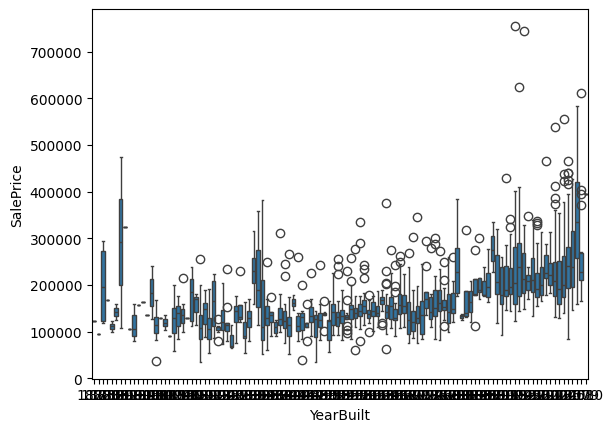

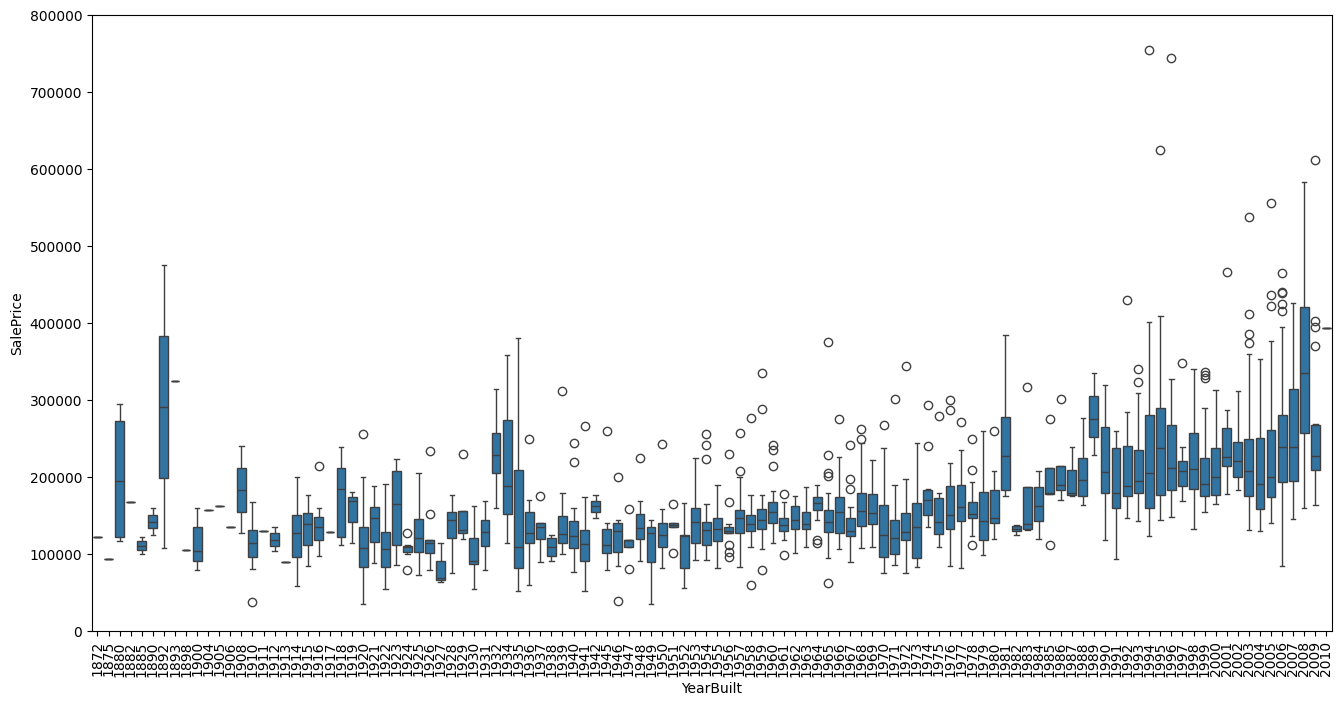

In [17]:
sns.boxplot(data=df, x="YearBuilt", y="SalePrice")
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

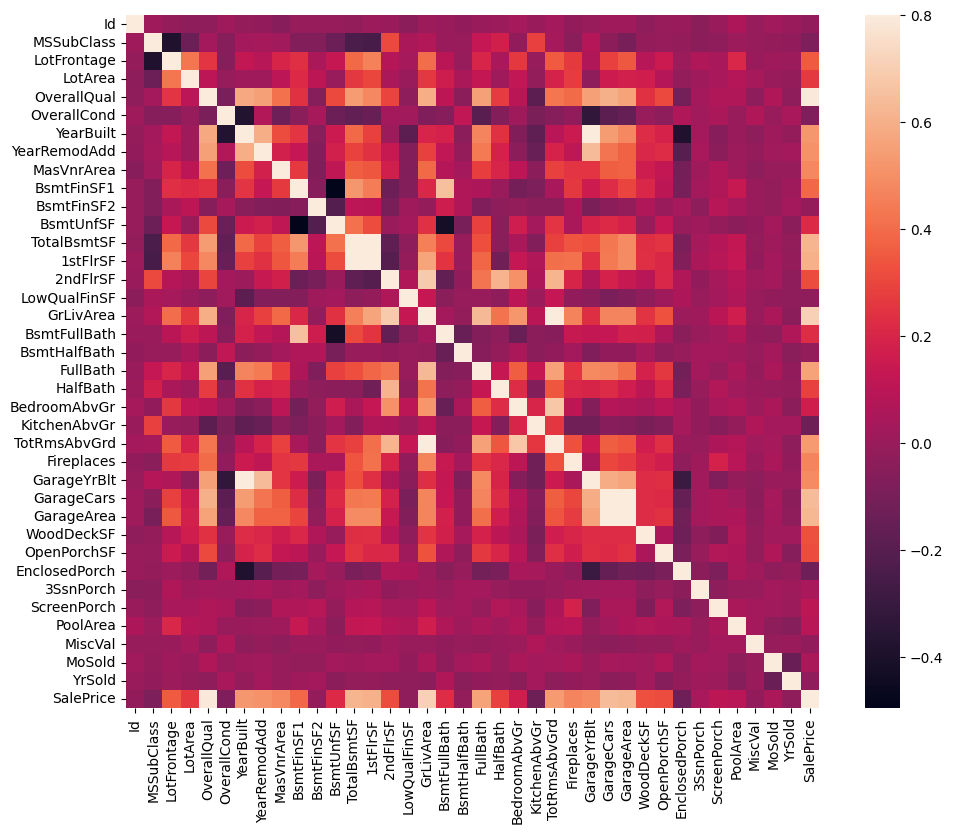

In [21]:

corrmat = numeric_cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# numeric_cols = df.select_dtypes(include=['int', 'float'])
# print(numeric_cols)
# numberic_column_names

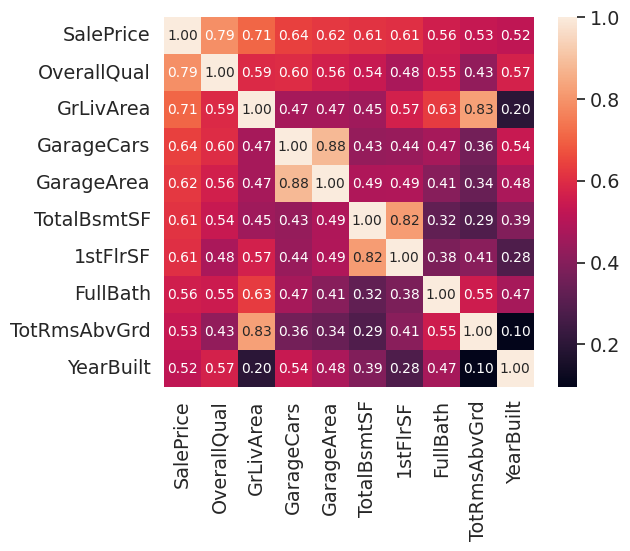

In [23]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numeric_cols[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

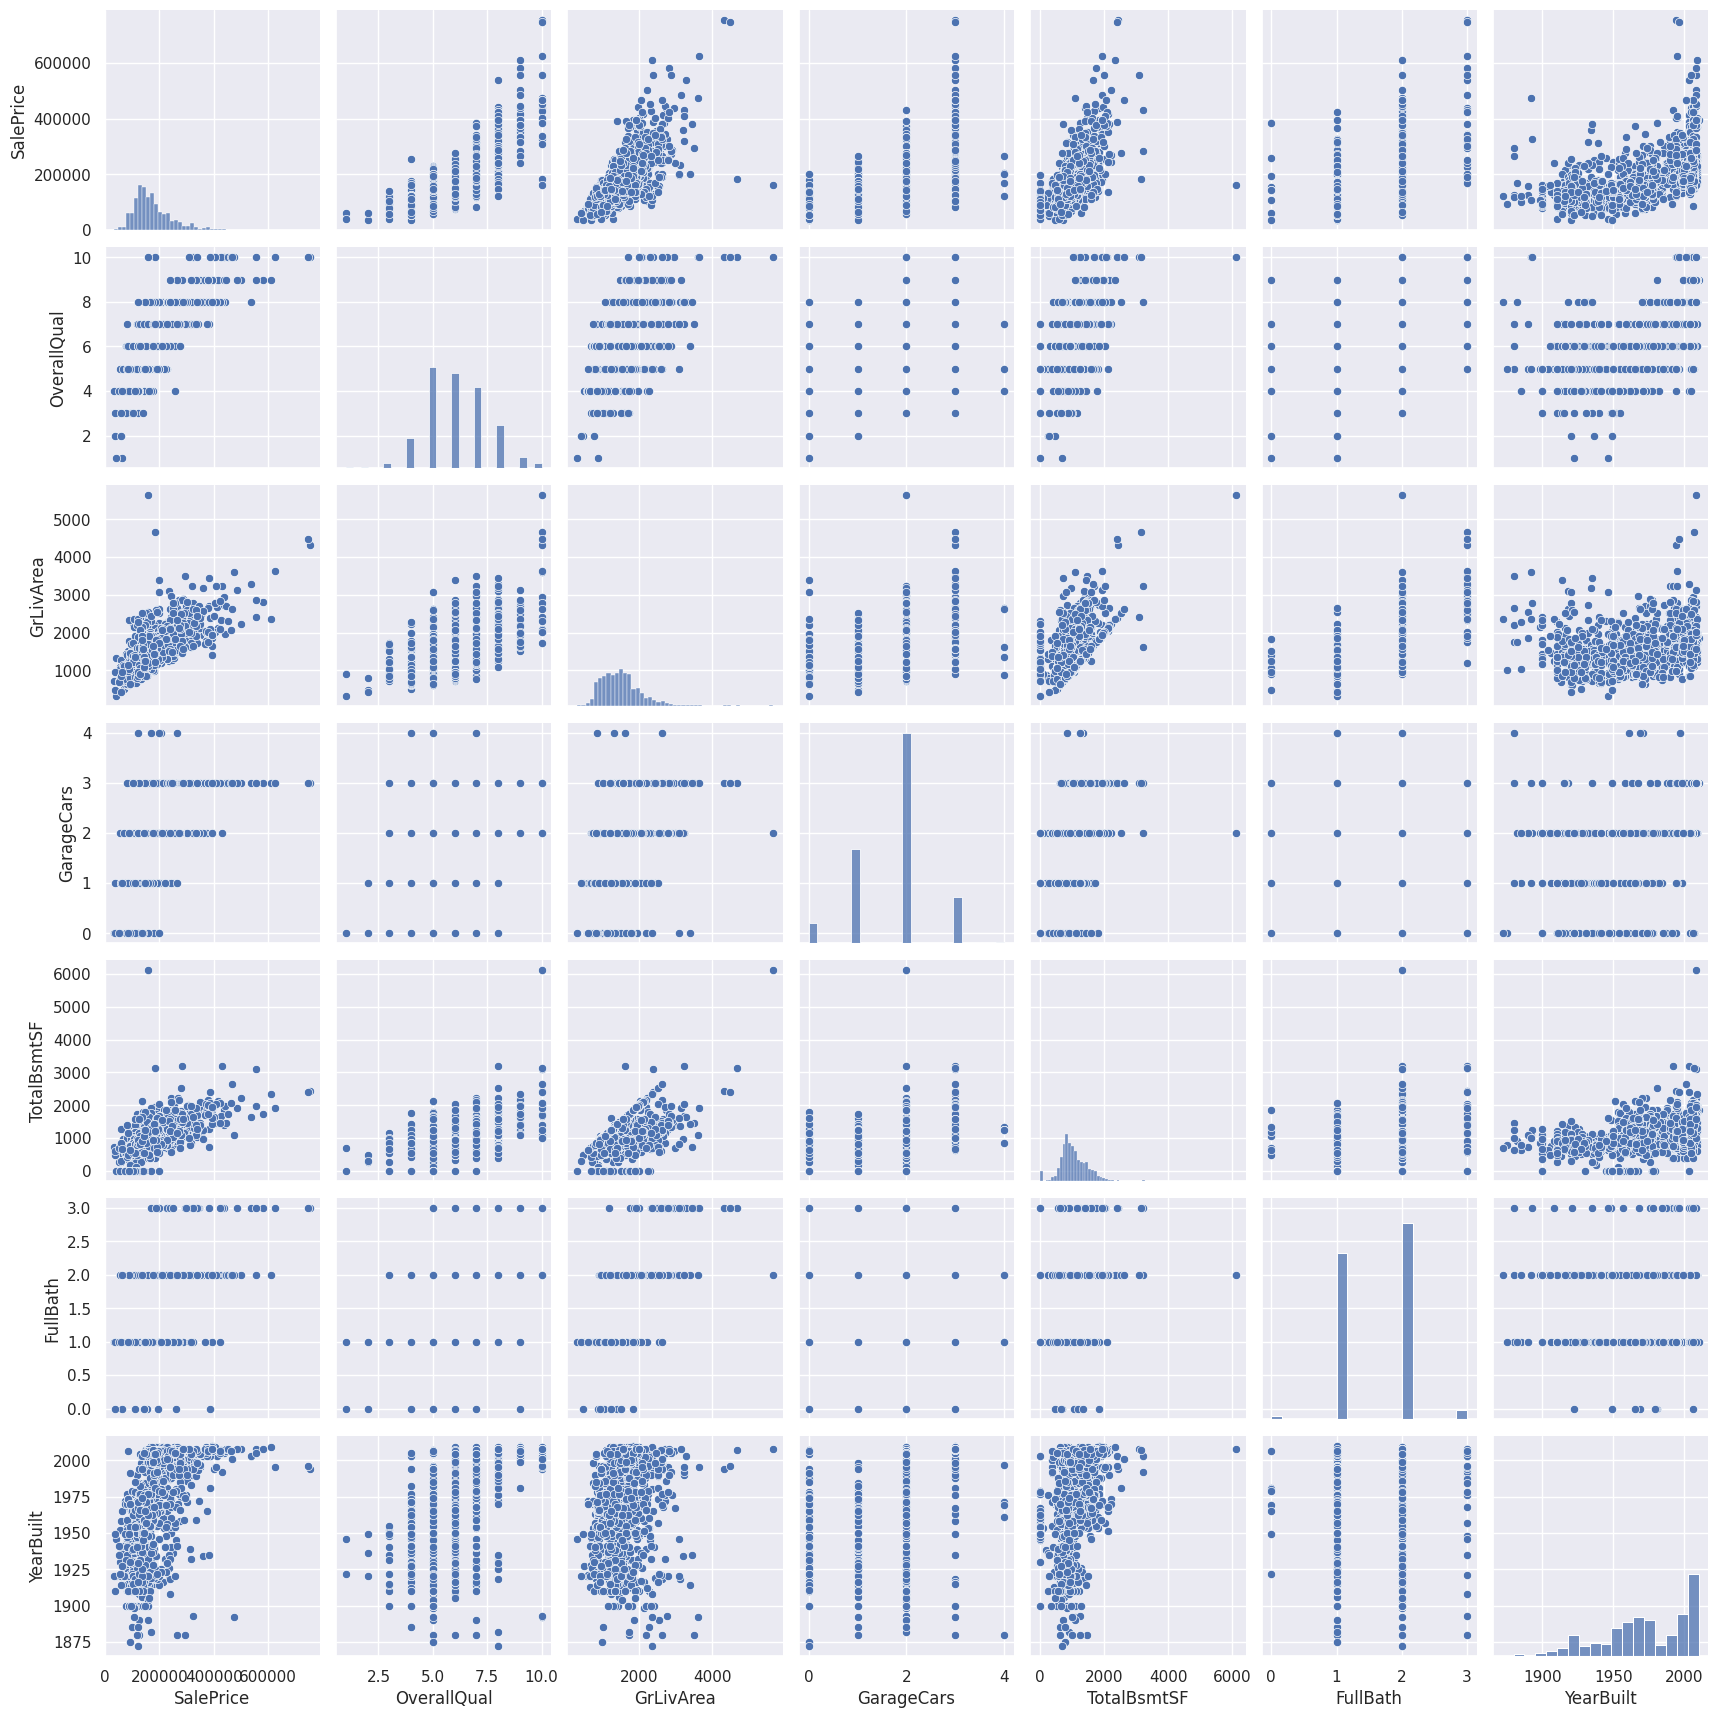

In [25]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(numeric_cols[cols], size = 2.5)
plt.show();

In [ ]:
#what columns have missing data and how to find them.
